In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
dataset =pd.read_csv("employee_2.csv")
dataset.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,171369.0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,136993.0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,113807.0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,166478.0
4,Masters,2017,NaN,3,24,Male,Yes,2,1,393136.0


In [4]:
# statistics meansures
dataset.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Salary
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1798.000000
mean,2015.076923,2.695075,26.310459,3.228002,0.362479,224240.323693
std,1.854077,0.564248,2.142854,1.302112,0.480849,100823.365853
min,2012.000000,1.000000,22.000000,0.000000,0.000000,50135.000000
25%,2013.000000,2.000000,25.000000,2.000000,0.000000,137712.250000
50%,2015.000000,3.000000,26.000000,3.000000,0.000000,226605.500000
75%,2017.000000,3.000000,27.000000,4.000000,1.000000,309474.000000
max,2018.000000,3.000000,40.000000,5.000000,1.000000,399785.000000


In [5]:
print("\nMax values:")
print(dataset[['Age', 'Salary']].max())

print("\nstandard D :")
print(dataset[['Age','Salary']].std())

print("covaiance :")
print(dataset[['Age','Salary']].cov())



Max values:
Age           40.0
Salary    399785.0
dtype: float64

standard D :
Age            2.142854
Salary    100823.365853
dtype: float64
covaiance :
                Age        Salary
Age        4.591823 -4.897130e+03
Salary -4897.130103  1.016535e+10


In [6]:
# grouping and binning
bins = [18, 25, 35, 45, 60]

labels = ['18-25', '25-35', '35-45', '45-60']

dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

dataset['Age_Group'].value_counts()

Age_Group
25-35    1109
18-25     672
35-45      26
45-60       0
Name: count, dtype: int64

In [7]:
# aggregations
grouped_stats = dataset.groupby('Age_Group')['Salary'].agg(['mean', 'median', 'max', 'min', 'std'])

# grouped_stats = dataset.groupby('Age_Group')['Salary'].mean()

print("\nGrouped Salary Statistics by Age Group:\n", grouped_stats)


Grouped Salary Statistics by Age Group:
                     mean    median       max      min            std
Age_Group                                                           
18-25      225847.299107  232190.0  399598.0  50135.0   98486.549117
25-35      223991.190000  226226.0  399785.0  50214.0  102130.165925
35-45      193246.461538  162553.5  397693.0  67213.0  103677.780964
45-60                NaN       NaN       NaN      NaN            NaN


C:\Users\harsh\AppData\Local\Temp\ipykernel_2752\1945991204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = dataset.groupby('Age_Group')['Salary'].agg(['mean', 'median', 'max', 'min', 'std'])


In [8]:
# Create a list of mean salary per age group
salary_list_by_group = grouped_stats['mean'].tolist()
print("\nSalary list by age group (mean):", salary_list_by_group)


Salary list by age group (mean): [225847.29910714287, 223991.19, 193246.46153846153, nan]


In [9]:
#counts 
dataset.head(5)
education = dataset['Education'].value_counts()
dataset['JoiningYear'].value_counts()
dataset['Gender'].value_counts()

Gender
Male      1071
Female     728
Name: count, dtype: int64

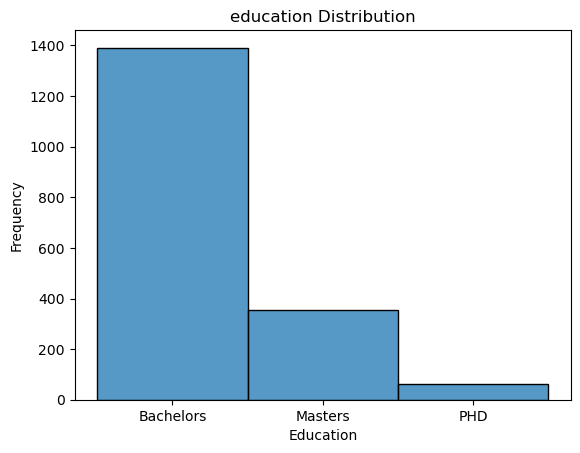

In [11]:
sns.histplot(dataset['Education'])

# Add title and labels
plt.title('education Distribution')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()


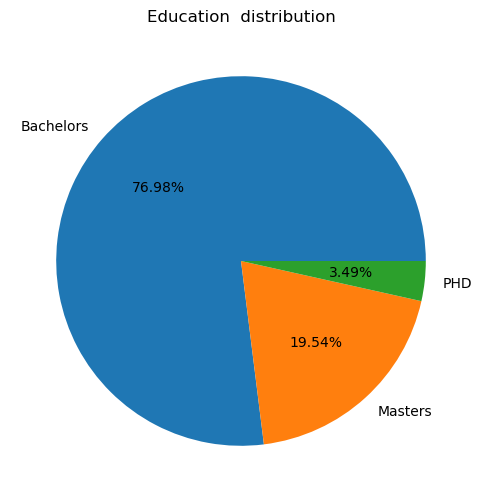

In [11]:
#Visualization 
plt.figure(figsize=(6,6))

plt.pie(education,autopct="%1.2f%%",labels=education.index)

plt.title("Education  distribution")

plt.show()